# Welcome to Lab: Justice ⚖️

We plan on continuing to explore simulation in Python this week. However, this time, we're going to simulate some **real-world events** that have actually happened in the past.  The goal is for you to see how we can use data science to think about issues of **equity** and **social justice**.  As usual, in addition to coding, we want you to get practice having **discussions about the data science** you're doing and think about how data science can be a useful tool that can help you in your future job and as a citizen.

**IMPORTANT NOTE**: In this lab, it's *very* important that you read through the text carefully. Understanding the context is crucial for success in `lab_justice` :)

A few tips to remember:

- **You are not alone on your journey in learning programming!**  You have your lab Teaching Assistant, your CAs, your lab group, and the professors (Prof. Wade and Prof. Karle), who are all here to help you out!
- If you find yourself stuck for more than a few minutes, ask a neighbor or course staff for help!  When you are giving help to your neighbor, explain the **idea and approach** to the problem without sharing the answer itself so they can have the same **<i>ah-hah</i>** moment!
- We are here to help you!  Don't feel embarrassed or shy to ask us for help!

Let's get started!

In [1]:
# Meet your CAs and TA if you haven't already!
# First name is enough, we'll know who they are! :)
ta_name = "Alex"
ca1_name = "Ana"
ca2_name = "Evan"
ca3_name = "Areeba"


# Working with your group will be particularly important for discussion purposes in this week's lab! 
#
# QOTD to Ask Your Group: "What is your comfort food?"
partner1_name = "Vivian"
partner1_netid = "vivian4"
partner1_comfortfood = "fruit"

partner2_name = "Medha"
partner2_netid = "medhak2"
partner2_comfortfood = "ramen"

partner3_name = ""
partner3_netid = ""
partner3_comfortfood = ""

<hr style="color: #DD3403;">

# Part 1: Jury Selection + Simulation

The 6th Amendment to the U.S. Constitution provides the right to an **“impartial jury”** in criminal prosecutions, but what exactly does this mean? The Supreme Court has said that juries must be drawn from a representative cross-section of the community. In other words, juries should be **randomly selected** from the eligible population. However, there are many instances in history where it doesn’t seem like this was the case.

Take for example, the case of Berghuis v. Smith.  In 1993, Smith (a Black man) was convicted of 2nd-degree murder by an **all-white** jury and sentenced to life in prison. The jury was selected from a panel of about 100 randomly selected people. Only 3 of them were Black and none of those 3 made it into the final 37 considered for Smith’s trial. The county population was approximately 8 percent Black at the time of the trial.  Remember, jury panels are supposed to be selected at random from the eligible population.

### Analysis: Your Initial Thoughts
**Group Discussion: Because 8% of the eligible population was Black, 3 Black people on a panel of 100 might seem low.  Does this difference (8% vs. 3%) seem big to you? Do you think this could be due to chance?**

**Q1: Write a few sentences summarizing what your group members said during your discussion.  Did people think this difference could have been due to chance or not?**


Yes, this difference could be due to chance.

This case was appealed and sent to the Supreme Court.  Some people claimed that the overall percentage disparity (between 8% and 3%) was small and reflected no attempt to include or exclude "a specified number of Black people from the jury." They claimed this "small" difference could simply be due to chance.  Critics and Smith claimed that the system of jury selection caused the lack of fair and reasonable representation of Black people on the jury.

## Puzzle 1.1: Writing a Function

Let’s do a simulation in Python to understand what’s going on.  We will eventually write a simulation to show the expected distribution.  

Remember, from the case: we're trying to see if the difference between 8% and 3% is small and reflects no attempt to include or exclude "a specified number of Black people."  In other words, we want to **write a function** to **randomly sample 100 people from a population that is 8% Black**. The function should `return` the **number of Black people in the simulated jury**.  We can do this multiple times and see how rare it is to get 3 or fewer Black people in the jury.

First, using the cell below, import any necessary Python libraries. To write this simulation, `pandas` and `random` might be useful...

In [15]:
import pandas as pd
import random

Then, in the following cell, define our simulation function. Remember, the function should **randomly sample 100 people from a population that is 8% Black**. The function should `return` the **number of Black people in the simulated jury**.

In [17]:
def simulateJuryPanel():
  number = 0
  for i in range(100):
      n = random.randint(1,100)
      if n <= 8:
          number += 1
  return number

simulateJuryPanel()

7

### 🔬 Test Case Checkpoint 🔬

In [18]:
## == TEST CASES for Puzzle 1.1 ==
# - This read-only cell contains test cases for your previous cells.
# - If this cell runs without any error our output, you PASSED all test cases!
# - If this cell results in any errors, check you previous cell, make changes, and RE-RUN your code and then this cell.
assert callable(simulateJuryPanel), "You should have defined `simulateJuryPanel` as a function above."
assert isinstance(simulateJuryPanel(), int), "Your simulateJuryPanel() function should return an integer that represents the number of Black people on a jury from a population that is 8% Black."
test_juries = [simulateJuryPanel() for i in range(20)]
for jury in test_juries:
    assert(0 <= jury <= 100), "Your simulateJuryPanel() should only return integers between 0 and 100."
assert abs((sum(test_juries) / 20) - 8) <= 3, "Your calculations in simulateJuryPanel() are incorrect."

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


## Puzzle 1.2: Storing Simulation Results

Now that we have a working `simulateJuryPanel()` function, let's do a simulation and store the results in a DataFrame for analysis. Let’s start by doing this simulation **200 times**. Simulate choosing **200 jury panels** and store the number of Black people selected in every panel. Store these results in a DataFrame named `df`. 

The variable or column in the DataFrame should be named `panel`. 

In [21]:
data = []
for i in range(200):
    data.append({"panel": simulateJuryPanel()})
df = pd.DataFrame(data)
df

,panel
0,7
1,7
2,9
3,8
4,5
...,...
195,7
196,11
197,7
198,8


### 🔬 Test Case Checkpoint 🔬

In [22]:
## == TEST CASES for Puzzle 1.2 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs with the success message as your output, you PASSED all test cases!
# - If this cell results in any errors, check your previous cell, make changes, & RE-RUN your code & then this cell.
assert('df' in vars()), "Make sure your DataFrame is named `df`."
assert('panel' in df.columns.to_list()), "Make sure your simulations are stored in a column named `panel`."
assert(len(df) == 200), "Your DataFrame is the wrong length. Perhaps you did not simulate 100 times?"

## == SUCCESS MESSAGE ==
# You'll only see this message (With the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


## Puzzle 1.3: Visualization

Now, let's visualize the results of our simulation. Using functions we've learned from prior labs, generate a histogram of the results below:

array([[<Axes: title={'center': 'panel'}>]], dtype=object)

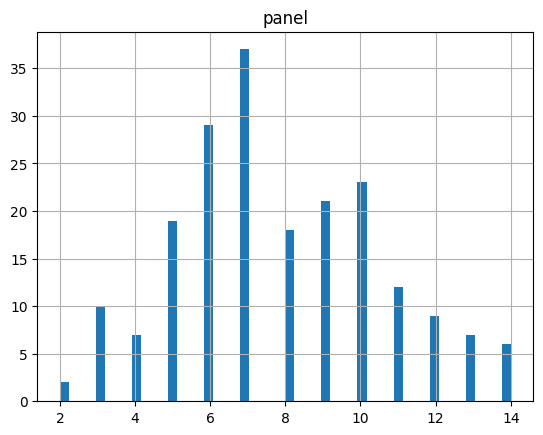

In [26]:
df.hist(bins=50)

### Analysis: Simulating Juries

**Group Discussion: Interpret the results of your histogram. How does your histogram provide evidence for or against the claim that the jury wasn't fair?  What does this tell us about this case?  Do you think this could have happened by chance?  If so, why? If not, why not?**

**Q2: Write down the most interesting takeaway from your group discussion.**

The histogram shows that 10/200 simulations had jurys with only 3 black people. A 5% chance is very possible to actually occur, so it could have happened by chance.

## Puzzle 1.4: Observed and Expected Value

### Analysis: Expected Value
**Q3: Considering our population metrics, what was the expected value for the number of Black people in the jury?**  

8

Using our simulation, we will observe and note any differences between the actual mean number of Black people in the juries and our expected value. 

Using the cell below, calculate the `mean` number of Black people in a jury from our `df` that you created from the simulation. Store your result in the variable `mean`. 

In [27]:
mean = df.panel.mean()
mean

7.84

### 🔬 Test Case Checkpoint 🔬

In [28]:
## == TEST CASES for Puzzle 1.4 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs with the success message as your output, you PASSED all test cases!
# - If this cell results in any errors, check your previous cell, make changes, & RE-RUN your code & then this cell.
assert('mean' in vars()), "You should store your calculated result for the mean in a variable named `mean`."
assert(mean < 10), "You didn't calculate the mean correctly!"
assert(mean > 5), "You didn't calculate the mean correctly!"

## == SUCCESS MESSAGE ==
# You'll only see this message (With the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


## Puzzle 1.5: Simulating, Again!

Run the simulation of picking juries again, but this time run your function **10,000 times.** 

First, run your simulation, storing data in a dataframe called `df2` with a column named `panel`.

**Hint:** you can use the same code that you've written for Puzzle 1.2 with **one** small change. 

In [29]:
data = []
for i in range(10000):
    data.append({"panel": simulateJuryPanel()})
df2 = pd.DataFrame(data)
df2

,panel
0,8
1,7
2,10
3,7
4,16
...,...
9995,8
9996,15
9997,7
9998,5


### 🔬 Test Case Checkpoint 🔬

In [30]:
## == TEST CASES for Puzzle 1.5 == 
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs with the success message as your output, you PASSED all test cases!
# - If this cell results in any errors, check your previous cell, make changes, & RE-RUN your code & then this cell.
assert('df2' in vars()), "Make sure your DataFrame is named `df2`."
assert('panel' in df2.columns.to_list()), "Make sure your simulations are stored in a column named `panel`."
assert(len(df2) == 10000), "Your DataFrame is the wrong length. Perhaps you did not simulate 10000 times?"

## == SUCCESS MESSAGE ==
# You'll only see this message (With the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


Now, using your results from `df2`, generate a histogram of the results below:

array([[<Axes: title={'center': 'panel'}>]], dtype=object)

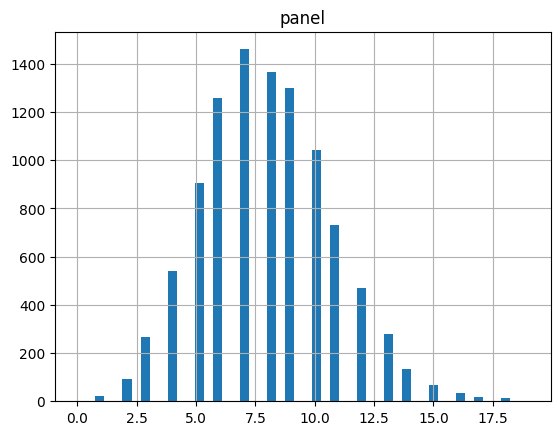

In [31]:
df2.hist(bins=50)

And just like before, find the mean number of Black people on the randomly selected juries from your **10,000 simulations**. Store the result in a variable `mean2`:

In [32]:
mean2 = df2.panel.mean()
mean2

7.9842

### 🔬 Test Case Checkpoint 🔬

In [33]:
## == TEST CASES for Puzzle 1.5 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs with the success message as your output, you PASSED all test cases!
# - If this cell results in any errors, check your previous cell, make changes, & RE-RUN your code & then this cell.
assert('mean2' in vars()), "You should store your calculated result for the mean in a variable named `mean2`."
assert(mean2 < 8.5), "You didn't calculate the mean correctly!"
assert(mean2 > 7.5), "You didn't calculate the mean correctly!"

## == SUCCESS MESSAGE ==
# You'll only see this message (With the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


## Puzzle 1.6: Probability

Now that we've done two simulations and some analysis, let's **estimate the probability** that we'll get **3 or less** Black men on the jury using `df2`.  Store your results in a variable named `probability`. You may want to think back to conditionals - that'll help here.

In [34]:
probability = len(df2[df2.panel <= 3])/len(df2)
probability

0.038

### 🔬 Test Case Checkpoint 🔬

In [35]:
## == TEST CASES for Puzzle 1.6 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs with the success message as your output, you PASSED all test cases!
# - If this cell results in any errors, check your previous cell, make changes, & RE-RUN your code & then this cell.
assert('probability' in vars()), "Your probability should be stored in a variable named `probability`."
assert(probability < 0.05), "You didn't calculate the probability correctly!"
assert(probability > 0), "You didn't calculate the probability correctly!"

## == SUCCESS MESSAGE ==
# You'll only see this message (With the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


### Analysis: Final Jury Reflections

**Q4: What does this probability mean? Given this probability, do you think this outcome is due to chance or not?**  

This means that there is approximately a 3.8% chance of randomly selecting 3 or less black men on a jury. Given 3.8%, I think that this outcome is likely not due to chance, but it is still certainly possible.

**Q5: How did your results change with a larger simulation? What does this tell us about the more simulations you run?**  

The 200 run simulation predicted 5%, and the 10,000 run simulation predicted 3.8%. This tells me that running a simulation more times will produce a more accurate probability estimation.

**Group Discussion: This is an example of how we can use statistics to help us solve real world problems.  Discuss with your group how simulations and data science can be used to help address issues of racism specifically.**

**Q6: Give an example of a way that we can use data science to help address issues of racism.  This can be something you discussed in your group or an example you're interested in.**

Statistics and data science can be used to determine when biases are having an impact on processes that are supposed to be random by identifying cases where the probability of the outcome is impossibly small, especially when considering multiple events in combination.

<hr style="color: #DD3403;">

# Part 2: Names and Resumes

Our next problem comes from a study looking at the correlation between names and the job hiring process.  You can read the fully study here if you’d like: 
>[https://www.nber.org/system/files/working_papers/w9873/w9873.pdf](https://www.nber.org/system/files/working_papers/w9873/w9873.pdf) 

Here’s a summary of some findings from their study: 
- The researchers sent out a total of **4,890 resumes** to postings in Chicago and Boston. 
- The resumes that they sent were **identical**, except they changed the **names and email addresses** to have either a "white sounding" name or a "black sounding" name, according to the study.  
- There were an equal number of resumes with "white sounding" and "black sounding" names sent out (2,445 each).
- The resumes with "white sounding" names were called back for an interview **10.06%** of the time while the "black sounding" names were called back for an interview **6.87%** of the time. 

### Analysis: Initial Thoughts

**Q7 (Group Discussion): Before we start coding, let’s think about this. Consider the results from the study above. Do you think this is a significant difference? Why do you think this happened? Why or why not is this problematic?**

**Q8: Write down something that surprised you from your group discussion.**

Yes, this is a significant difference. I think this happened because of racist and biased people doing the hiring. This is problematic because it is an unfair disadvantage to black people.

**Assuming** that **any given resume** has about a **20% chance** of getting a call back, let’s simulate this study.

Since the content of the resumes are identical, we should expect to get an **equal number of callbacks** for both types of names.  In other words, picking the callbacks should be like **random sampling**. 

We've simulated the data in `resumes.csv` and wrote part of a simulation function to randomly sample 20% of the **4,890** resumes 10,000 times. You will load in the data and complete the simulation below. 

## Puzzle 2.1: Load in the Data

In the same folder as this lab, you have a **dataset of resumes** named `resumes.csv` that contains **4,890 rows** - the **same number** of resumes used in the study. 

Half are 0s (representing resumes with "white sounding" names) and the other half are 1s (representing resumes with "black sounding" names).

Using `pandas`, load this data into a DataFrame named `df3`:

In [36]:
df3 = pd.read_csv("resumes.csv")
df3

,Resumes
0,0
1,0
2,0
3,0
4,0
...,...
4885,1
4886,1
4887,1
4888,1


### 🔬 Test Case Checkpoint 🔬

In [37]:
## == TEST CASES for Puzzle 2.1 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs with the success message as your output, you PASSED all test cases!
# - If this cell results in any errors, check your previous cell, make changes, & RE-RUN your code & then this cell.
assert('df3' in vars()), "Your DataFrame of resumes should be named `df3`."
assert((len(df3) == 4890) & ('Resumes' in df3.columns.to_list())), "This isn't the Dataset we are looking for. Make sure you are loading the resumes.csv file."

## == SUCCESS MESSAGE ==
# You'll only see this message (With the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


## Puzzle 2.2: Complete the Function

Below is an incomplete function that **samples 20% of the 4890 rows** and **counts the numbers of 0s and 1s**. 

Complete the **second line of code** inside this function to **randomly sample 20% of `df3`** and store the results in a DataFrame named `df4`. 

Make sure to run the cell after filling in the code to see our results!

In [58]:
def simulateResumes():
    ... ## fill in this line of code that randomly samples 20% of df3 and stores the results in df4
    df4 = df3.sample(frac=0.2)
    white_sounding = len(df4[df4.Resumes == 0])
    black_sounding = len(df4[df4.Resumes == 1])
    return white_sounding, black_sounding
    
simulateResumes() 

(490, 488)

### 🔬 Test Case Checkpoint 🔬

In [43]:
## == TEST CASES for Puzzle 2.2 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs with the success message as your output, you PASSED all test cases!
# - If this cell results in any errors, check your previous cell, make changes, & RE-RUN your code & then this cell.
assert callable(simulateResumes), "You should have defined `simulateResumes` as a function above."
assert isinstance(simulateResumes(), tuple), "Your simulateResumes() function should return a pair of ints that represents the number of white-sounding and black-sounding names chosen."
test_instance = simulateResumes()
assert(test_instance[0] + test_instance[1] == 978), "Your function doesn't return the correct number of resumes. Make sure you are sampling 20 percent of df3."


## == SUCCESS MESSAGE ==
# You'll only see this message (With the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


## Simulating The Study

Now that we've defined our `simulateResumes()` function properly, we can simulate randomly picking **20% of the 4890 resumes 10,000 times**! This has been **done already in the cell below**. Each time we call `simulateResumes()`, the 20% that we sample represents the resumes that got **callbacks**. We're then creating a DataFrame named `df5` that contains the number of black sounding names and white sounding names. 

**DO NOT change anything in the following cell, just run it!**

In [59]:
data = []
for i in range(10000):  # Simulate 10,000 times
  result = simulateResumes()
  data.append( { 'white_sounding': result[0], 'black_sounding': result[1]} )
df5 = pd.DataFrame(data)
df5

,white_sounding,black_sounding
0,469,509
1,501,477
2,497,481
3,494,484
4,502,476
...,...,...
9995,483,495
9996,488,490
9997,488,490
9998,470,508


## Puzzle 2.3: Calculating the Callback Rate

Now that we've got our simulation results stored in `df5`, let's do some calculations and analysis. 

We will calculate **average callback rate** for **each group of names** in the simulation (these should be **close to 20%** for each group of names). The average callback rate for a group of names can be calculated by taking the number of callbacks for that group and dividing it by the number of submitted resumes for that group.

First, using the cell below, calculate the **average callback rate** of the resumes with **"white sounding"** names using the **average number of white sounding callbacks** from all the simulations and the number of **white sounding** resumes submitted in the study, storing your decimal result in the variable `avg_white`.  

Remember that for **each simulation** (represented by a row in `df5`), there were a total of **4,890 resumes** submitted in the study, and **half** of them used names that are "white sounding".

In [65]:
avg_white = df5.white_sounding.mean()/2445
avg_white

0.19993108384458078

Next, using the following cell, calculate the **average callback rate** of the resumes with **"black sounding"** names using the **average number of black sounding callbacks** from all the simulations and the number of **black sounding** resumes submitted in the study, storing your decimal result in the variable `avg_black`.  Remember there were a total of **4,890 resumes** submitted in the study, and **half** of them used names that are "black sounding".


In [66]:
avg_black = df5.black_sounding.mean()/2445
avg_black

0.20006891615541922

### 🔬 Test Case Checkpoint 🔬

In [67]:
## == TEST CASES for Puzzle 2.3 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs with the success message as your output, you PASSED all test cases!
# - If this cell results in any errors, check your previous cell, make changes, & RE-RUN your code & then this cell.
import math 
assert('avg_white' in vars() and 'avg_black' in vars()), "Your probabilities should be named `avg_white` and `avg_black`."
assert(isinstance(avg_white, float) and isinstance(avg_black, float)), "Your probabilities should be a percentage represented as a decimal (float) value."
assert(math.isclose(avg_white, 0.2, abs_tol = 0.005)), "Your avg callback rate for resumes with white-sounding names is incorrect."
assert(math.isclose(avg_black, 0.2, abs_tol = 0.005)), "Your avg callback rate for resumes with black-sounding names is incorrect."

## == SUCCESS MESSAGE ==
# You'll only see this message (With the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


### Analysis: Simulation versus Reality

**Q9: Think about how these callback percentages we've calculated above (`avg_white` and `avg_black`) compare to the actual percentages (10.33% vs. 6.87%).  What does this say about discrimination based on your name?**

The results indicate that discrimination based on name almost certainly happened because of the extreme disparity in callback percentages.

<hr style="color: #DD3403;">

# Part 3: Beyond DISCOVERY

**Group Discussion: The Smith trial happened in 1993 and the name study occurred in the early 2000s.  Discuss with your group whether or not you think similar events still occur today & why. Reflect on how data science can be used to educate people about this.**

**Q10: Think about your takeaways from doing these simulations in this lab.  Choose 1 of the following prompts to write a *paragraph style* response explaining what the simulation showed in either Part 1 or Part 2.**

**Option 1**: Part 1 - Pretend that you're a **defense attorney** and a **data scientist**. Write a **memo to the Supreme Court** positioning yourself as a data scientist arguing whether or not your think the jury with 3 Black men was randomly selected. **Justify** your decision and include **guidelines** for the future.

**Option 2**: Part 2 - Pretend that you're a **data scientist** arguing whether or not there was **discrimination** based on how applicants’ names sound. Write a memo to the **HR Department** of one of the companies positioning yourself as a data scientist arguing whether or employers are biased against certain names. **Justify** your decision using what you’ve already done and include **guidelines** for the future.


Remember, you only need to do **either** Option 1 or Option 2 (not both)!

Dear HR Department, 

I am a data scientist who investigates potential cases of racial discrimination. We recently conducted a study where we sent out identical resumes to different companies, but half of the resumes had white-sounding names and half had black-sounding names. The results of the study indicated that 10.33% of the white-sounding names were called back for an interview, while only 6.87% of black-sounding names were called back for an interview. We also ran a simulation of this scenario 10,000 times and the results indicated that both types of resumes should have recieved equal treatment. This means that name discrimination took place where we sent in these resumes, and your company was one of the companies. Therefore, I suggest a guideline for the future. During the preliminary hiring process, employers should not be considering an applicants name.

<hr style="color: #DD3403;">

## Submission

You're almost done!  All you need to do is to commit your lab to GitHub:

1.  ⚠️ **Make sure to save your work.** ⚠️ To do this, go to **File => Save All**

2.  After you have saved, exit this notebook & follow the Canvas instructions to commit this lab to your Git repository!

3. Your TA will grade your submission & provide you feedback after the lab is due. :)